What follow is a summary of chapter 6 of Barlow, written by Marcus Mähring: mmaehring@student.ethz.ch. 

This chapter handels the least-squares method, some numerical examples of this fitting procedure, and gives a light introduction to goodness-of-fit tests. 

In [10]:
using LinearAlgebra, LsqFit, Plots, Optim, Measurements

# The Least Squares Method
The method of least squares is a way of determining unknown parameters from a set of data. In other words, it describes a <i>fitting procedure</i> for a model.

This could be seen as an extension of last chapter, where we described estimators and other fitting procedures. Nevertheless, this method is important enough that it deserves its own chapter. 

In the basic form, assume we have two variables, $x$ \& $y$ and
 1. a set of precisely known $x$ values
 2. a corresponding set of $y$ values, measured with some accuracy $\sigma$
 3. a function $f(x; a)$ which predicts the corresponding $y$ for every $x$-value. This function also involves an unknown parameter $a$, which we are trying to determine. 
 
## General outline of the method
The principle of least squares stems from the the principle of maximum likelihood (we are assuming that the measurements follow a Gaussian distribution); it can also be seen as a sensible estimator. 

"Least squares" pertains to minimizing the (most often weighted) squared difference between a set of measurements and their predicted values. The fact that we are squaring the difference puts emphasis on the fact, that we are trying to minimize large deviations. 

The basic and most used form of the least squares method assumes we have a set of <i>precise</i> values for $x$ - $\{x_1, x_2, \dots, x_N\}$ - with a corresponding set of measurements of $y$ - $\{y_1, y_2, \dots, y_N\}$ where each measurement has some accuracy (error) $\sigma_i$. Taking the sum over all points of the squared difference between the measurement $y_i$ and the prediction of $f$ scaled by the error. This sum is called the <b>$\chi^2$</b>
$$
    \chi^2 = \sum_{i=1}^{N} \left[ \frac{y_i - f(x_i; a)}{\sigma_i} \right]^2
$$
Now we need to find the parameter $a$, which minimizes this expression. We do this by solving the equation:
$$
    \frac{d \chi^2}{da} \overset{!}{=} 0
$$
that is (removing the common factor of $-2$ from the differentiation):
$$
    \sum_i \frac{1}{\sigma_i^2}\frac{df(x_i;a)}{da} [y_i - f(x_i; a)] \overset{!}{=} 0 
$$
The resulting estimate which we denote $\hat{a}$ is now hopefully a good estimate of the true value. However, it will most likely, as always, not correspond exactly. The error of this estimate is known, as the solution of the above equation giving $\hat{a}$ is a function of the $y_i$. These measurements have known errors, and can thus be used to propagate the error unto $\hat{a}$. 

If the function is dependent of several parameters, $\vec{a} = \{a_1, \dots, a_{N} \}$, we minimize the parameters separately:
$$
    \nabla_{\vec{a}} \chi^2\left(x; \vec{a}\right) \overset{!}{=} 0 
$$
This optimization can become quite difficult in higher dimensions when several parameters are involved. For such problems, a prevalent algorithm is that of <i>gradient descent</i>. 

Note we need at least the same amount of measurement points as parameters to determine. 

<b>Example:</b> We wish to fit the function $f(x; a, b) = a x + b$ to a single measurement $\left[(1, 2 \pm 0.1)\right]$. 

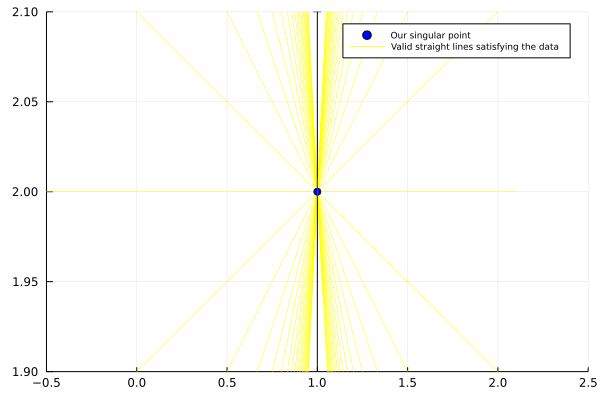

In [78]:
plot()
for a in -2:0.1:2
    b_tmp = 2.0 - a
    temp_f = x -> a .* x .+ b_tmp
   plot!(temp_f, color=:yellow, lw=0.5, label=:none) 
end
scatter!([(1.0, 2±0.1)], xlims=(-0.5, 2.5), ylims=(1.90, 2.10), label="Our singular point", color=:blue)
plot!(x -> 2 .* x, color=:yellow, lw=0.25, label="Valid straight lines satisfying the data", legendfontsize=6) 

### The simplest case - a strictly straight line fit
We now fit the function $f(x) = mx$. Here we have one parameter $m$ and the expression for $\chi^2$ takes the form:
$$
    \chi^2 = \sum_i \frac{(y_i - m x_i)^2}{\sigma_i^2}
$$
performing the derivate in $m$: 
$$
    \frac{d\chi^2}{dm} = - 2 \sum_i x_i \frac{y_i - m x_i}{\sigma_i^2}
$$
To solve this expression analytically, we now assume that $\sigma_i$ is the same for all measurements, and we factor out the common factor $\sigma^2$. Consider the extremized equation for the estimator $\hat{m}$.
$$
    -\frac{2}{\sigma^2} \sum_i x_i y_i - \hat{m} x_i^2 = 0 \qquad \implies \qquad \sum_i x_i y_i = \sum_i \hat{m} x_i^2
$$
We can divide both sides by N (number of data points) and rearrange to get (averages):
$$
    \hat{m} = \frac{\overline{xy}}{\overline{x^2}} = \sum \frac{x_i}{N \overline{x^2}}y_i
$$
Thus we can derive the errors from each $y_i$:
$$
    V(\hat{m}) = \sum \left(\frac{x_i}{N\overline{x^2}}\right)^2 \sigma^2 = \frac{\sigma^2}{N \overline{x^2}}
$$


### The straight line fit